# Investing in the stock market (the eighth world wonder)

**Project deadline:** This project is due for submission on Wednesday, 11.05.2022, 23:59. Please check carefully the *About the Projects* section below for further details.

**Important:** You have the choice to work either on this project or on another one from Nina. We strongly advise you to read through both project notebooks completely before you take a decision.

## About the Projects
- You will get one project approximately every other week.
- Besides the homework-assignmentts, you need to solve the projects in order to pass the course. Your final course mark consists of the mean of your project marks. We aim to hand-out six projects during the term and we do not consider the worst project mark for your final course mark. Projects that you do not hand in are counted with a mark of 4.
- The projects needs to be submitted by uploading a modified version of this notebook to [Projects/Project 1](https://ecampus.uni-bonn.de/goto_ecampus_exc_2645968.html) on eCampus. Please only upload this notebook and no other files. You also do not need to change its filename before your upload. Your project must be on eCampus by Wednesday, 11.05.2022, 23:59. **No late uploads can be accepted!**
- **In contrast to the homework exercises, each student must hand in an own solution for the projects! Of course you can and should discuss problems with each other! However, you need to be able to explain your solution in detail to your tutor and/or the lecturers! We might ask you for an interview about your project if the solution is (close to) identical to another students submission.**

**Note:** The tutors, Nina and I are very happy to help you out with difficulties you might have with the project tasks! You can ask questions any time but please do so well in advance of the deadlines!

### Your Name here please: Paarth Thakkar

## Introduction

In this project, we want to look at a long-term strategy to invest money in the stock market.

On the stock market, we can invest into individual companies such as Apple, Sony, Deutsche Telekom, McDonalds etc. While investments in individual companies can result in very high profits if you pick the right ones, they also carry the risk of significant or even total losses - perhaps some of you remember WireCard (a once very famous German tech-company) which went bankrupt within a few days during 2020 (featured in this very well done [video](https://www.youtube.com/watch?v=ivACzzW5wyA)). To minimise risks, a stock market portfolio should be broadly diversified over countries and indistrial sectors. An attractive option to realise this for private investors are so-called index funds. The so-called `MSCI-World` index allows you to invest with little money in $\approx 1500$ large companies from 23 countries of the developed world. 

If we believe that the world economy steadily grows (it better does!), an investment in such an index has an expected return larger than 0 **in the long term**! We want to investigate in this notebook what time horizon an investment should have to not loose money.

The figure below shows the chart-development of the MSCI-index from December 1987 to October 2021.

<img src="figs/MSCI_chart.png" width="400" height="200" />

The value of the index is in arbitrary units (normalised to 1 for the first data point). The absolute values (e.g. in Dollars or Euros) are irrelevant for the entire project. 

## 0. Chart developement of the MSCI-World Index

In [2]:
%matplotlib inline

# noetige Imports
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt

The file [MSCI.txt](MSCI.txt) contains data for the MSCI-World index from December 1978 to October 2021:

In [3]:
!head data/MSCI.txt

The two columns contain date - one data-point for each month - and mean value of the index during that month. The dates are represented with numbers such as 1979.XX. The exact meaning of the decimal place (XX) does not matter for the tasks ahead.

In the following cell, I show you how to read the file, decompose its contents into two `numpy`-arrays `dates` and `values` and reproduce the figure above. We did not yet cover this in class.

Text(0, 0.5, 'MSCI-World index [dimensionless units]')

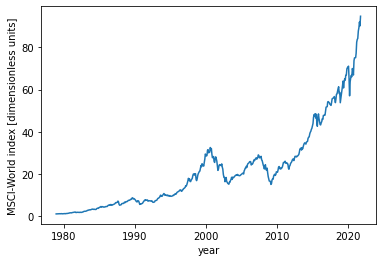

In [4]:
# read data into a 'two-dimensional'
# numpy-array 'data' and split it up in
# two one-dimensional arrays:
data = np.loadtxt('data/MSCI.txt')
dates = data[:,0]
values = data[:,1]

plt.plot(dates, values)
plt.xlabel('year')
plt.ylabel('MSCI-World index [dimensionless units]')

## 1. Wonderful returns

An investment in the `MSCI-World` is often advertised with phrases as *The MSCI-World yielded a mean yearly interest of about 11% since 1979!* 

Let us first verify this statement.

Investing an amount $x$ with a fixed-interest of $z$ (in percent), your money has increased after $n$ years to an amount $y$ of

$$
y = x(1+z)^{n}
\label{eq:interest} \tag{1}
$$

(compound interest formula). 

Assume in the following that you invest the value of the MSCI-index to a given time and, at the end of the investment, you obtain the index value at the corresponding date. Hence, the value of your investment always corresponds to the value of the index. If you had invested a different amount of money, you only would need to multiply that amount with the corresponding values of the index. This however is irrelevant for the task because we only are interested in interest rates.

**Example:**
Investing in Dec. 1978, we do this with one unit of money (first data point). In October 2021 (last data point), the investment returns 94.78 units.

Given those values, calculate with eq. (\ref{eq:interest}) the annual percentage rate of an investment into the MSCI-World from Dec. 1978 to Oct. 2021.

**Hint:** For this **very long-term investment**, the advertisement is correct and you should obtain 11%.

In [86]:
# Your solution here please

# defining a function to calculate interest rate
def compound(y, x, n):
    return ((y / x) ** (1 / n) - 1) 

# defining all the variables to pass them in the function 
t = dates[-1] - dates[0]
print("The time duration is", t, "years")

ini = values[0]
print("The principle amount is", ini)

fin = values[-1]
print("The final amount is", fin)

# Printing the final rate of interest
print("The rate of interest for the given duration is", compound(fin, ini, t) * 100, '%')

The time duration is 42.84999999999991 years
The principle amount is 1.0
The final amount is 94.78
The rate of interest for the given duration is 11.20673195668418 %


In charts with an exponential growth, one often gets the misleading impression that recent years were very special with extreme growth rates. Please plot the MSCI index together with eq. (1) and the interest rate from the last cell with a logarithmic scale to demonstarte that nothing special happened in recent years (in contrast to the first years of the period).

**Hint:** To obtain a logarithmic y-axis in a plot, you can use the command `plt.yscale('log')`.

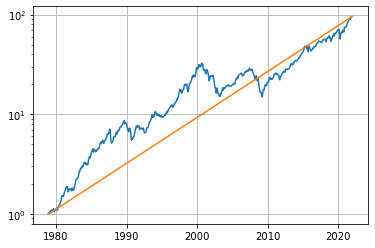

In [88]:
# Your solution here please

x = np.arange(0, 44)
z = compound(fin, ini, t)
plt.plot(dates, values)
plt.plot(x + 1979, (1 + z) ** x)
plt.yscale('log')
plt.grid()

Please write now a function `interest` with the following signature:

```python
def interest(x, y, n):
    """
    The functions input are the money
    to invest, the amount of money at the
    end of the investment and the investment
    time in years. The functions result (return
    value) is the fixed yearly interest rate
    according to eq. (1)

    The function works for scalar input as well
    as for numpy-arrays- In the latter case, a
    corresponding array with interest rates is returned.
    """
```

In [96]:
# Your solution here please

def interest(x, y, n):
    return ((y / x) ** (1 / n) - 1) 

x = 100
y = 10000
n = 30
print(interest(x, y, n))

0.1659144011798317


In [97]:
# This cell is for testing purposes. The following
# code-line should output an interest rate of 11 %:
interest(values[0], values[-1], dates[-1] - dates[0])

0.1120673195668418

## 2. Shorter time-horizons for an investment
The MSCI index-chart suggests that the high 11% *mean* interest rate is not what you can expect for shorter investments. Indeed, you can loose a lot of money. For instance, the markets went down significantly after the year 2000 (the famous [dotcom bubble](https://en.wikipedia.org/wiki/Dot-com_bubble) which resulted from excessive speculations on internet-related companies).

In [98]:
# Please convince yourself that the following lines calculate
# the interest rate for an investment from 2001 to 2003
# (we have data for each month starting from Dec. 1978).
# I include this cell to give you some help for the tasks below.

# You should get a result of -0.259 (another test of your function
# 'interest' above).
x = values[1 + 12 * 22]
y = values[1 + 12 * 24]
n = dates[1 + 12 * 24] - dates[1 + 12 * 22]
print(dates[1 + 12 * 22], dates[1 + 12 * 24])
print(interest(x, y, n))

2001.08 2003.08
-0.2590133048942316


Please create now a `numpy-array` `interests` which contains the interests *for all possible MSCI investments of exactly one year*. The first entry of your array is the interest rate for an investment between Dec. 1978 and Dec. 1979, the second entry represents an investment from Jan. 1979 to Jan. 1980, the third one from Feb. 1979 to Feb. 1980 an so on.

Plot a histogram of your `interests` array - please have a look at the function `plt.hist` for this.

Calculate mean and standard deviation of your `interests` array. Which was to-date the best and which the worst year for a one-year investment into the MSCI-World. Print all these quantities.

**Hints:**
(1) The function `interest` accepting `numpy`-arrays and array-slicing of the `dates` and `values` arrays allows you to get the `interests` array in about three very short lines; (2) For the last part of this task, the functions `np.argmin` and `np.argmax` might be helpful.

The mean of the interests is 0.12681114316930317
The standard deviation is 0.18960262996984859
The worst year for one-year investment was 2002.23 with an interest rate of -39.021431459765466 %
The best year for one-year investment was 1982.46 with an interest rate of 63.2183908045977 %


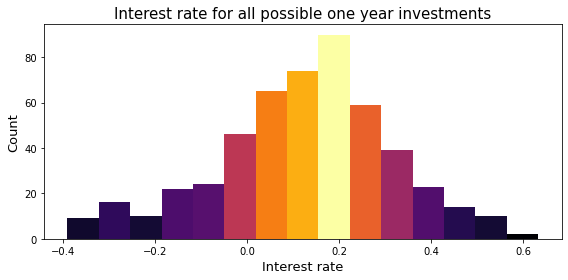

In [124]:
# Your solution here please

# Importing some additional packages for making colorful plots
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

interests = np.array([]) # declaring an interests array

for j in range(0, int(len(dates))):
    if j + 13 > len(dates): break
    x = values[j]
    y = values[j + 12]
    n = dates[j + 12] - dates[j]
    interests = np.append(interests, interest(x, y, n))


x = interests
n_bins = 15

fig, axs = plt.subplots(figsize = (8, 4), tight_layout=True)
axs.set_title("Interest rate for all possible one year investments", fontsize = 15)
axs.set_xlabel("Interest rate", fontsize = 13)
axs.set_ylabel("Count", fontsize = 13)

# N is the count in each bin, bins is the lower-limit of the bin, size gives the range of the histogram
N, bins, interval = axs.hist(x, bins=n_bins)

# Color coding by height
fracs = N / N.max()

# Normalizing the data for full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thisinterval in zip(fracs, interval):
    color = plt.cm.inferno(norm(thisfrac))
    thisinterval.set_facecolor(color)

print("The mean of the interests is", np.mean(interests))
print("The standard deviation is", np.std(interests))
print("The worst year for one-year investment was", dates[np.argmin(interests)], "with an interest rate of",
     interests[np.argmin(interests)] * 100, "%")
print("The best year for one-year investment was", dates[np.argmax(interests)], "with an interest rate of",
     interests[np.argmax(interests)] * 100, "%")

Please generalise your code from the last cell to work with an arbitrary investment period. Introduce a variable `years`. This variable should be the only place you need to change to obtain your histogram for an investment time-horizon `years`. Look at the histograms for different times between one and 30 years. What do you observe?

You ask a student peer for the expected interest-rate of an $n$-year investment into the MSCI-World. She answers something like:

$$
z_{n} = z_{n, \rm{mean}} \pm \sigma_{n},
$$

where $z_{n, \rm{mean}}$ and $\sigma_{n}$ are the mean and standard deviations from above. Is this description of interest-rate and its error justified statistically (hint: gaussian random variable)? What would you do if somebody asked you for the expected interest-rate and an uncertainty on that quantity? 

The mean of the interests is 0.0998752551410481
The standard deviation is 0.07458855250141833
The worst year for one-year investment was 2002.23 with an interest rate of -6.603382398091673 %
The best year for one-year investment was 1980.23 with an interest rate of 27.891986708718974 %


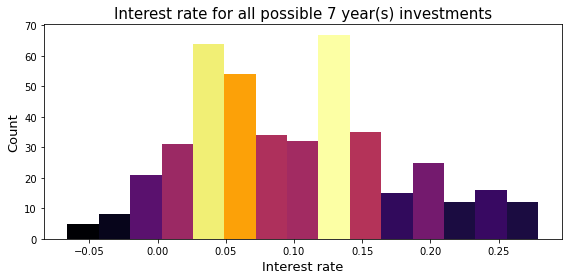

In [130]:
# Introducing the variable years

years = 7 # can be set to whatever value

interests = np.array([]) # declaring an interests array

for j in range(0, int(len(dates))):
    if j + (years * 12) + 1 > len(dates): break
    x = values[j]
    y = values[j + (years * 12)]
    n = dates[j + (years * 12)] - dates[j]
    interests = np.append(interests, interest(x, y, n))

    
x = interests 
n_bins = 15

fig, axs = plt.subplots(figsize = (8, 4), tight_layout=True)
axs.set_title("Interest rate for all possible %d year(s) investments" %years, fontsize = 15)
axs.set_xlabel("Interest rate", fontsize = 13)
axs.set_ylabel("Count", fontsize = 13)

# N is the count in each bin, bins is the lower-limit of the bin, size gives the range of the histogram
N, bins, interval = axs.hist(x, bins=n_bins)

# Color coding by height
fracs = N / N.max()

# Normalizing the data for full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thisinterval in zip(fracs, interval):
    color = plt.cm.inferno(norm(thisfrac))
    thisinterval.set_facecolor(color)

print("The mean of the interests is", np.mean(interests))
print("The standard deviation is", np.std(interests))
print("The worst year for one-year investment was", dates[np.argmin(interests)], "with an interest rate of",
     interests[np.argmin(interests)] * 100, "%")
print("The best year for one-year investment was", dates[np.argmax(interests)], "with an interest rate of",
     interests[np.argmax(interests)] * 100, "%")

## Your answer here please

Please use what you have done up to now to reproduce the following plot:

<img src="figs/interest_rates.png" width="400" height="200" />

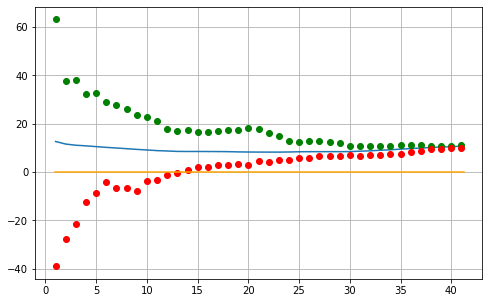

In [126]:
# Your solution here please

# In order to generalize the code, we introduce a for-loop to loop 
# over different time periods from 1-30 years

interests = np.array([])
period = np.array([])
meanmat = np.array([])
count_period = np.array([])
themax = np.array([])
themin = np.array([])

for j in range(12, (12 * int((dates[-1] - dates[0]))), 12):
    for k in range(0, int(len(dates))):
        if k + (j + 1) > len(dates):break
        x = values[k]
        y = values[k + j]
        n = dates[k + j] - dates[k]
        interests = np.append(interests, interest(x, y, n))
        period = np.append(period, n)

interests = interests * 100

for dur in range(1, int((dates[-1] - dates[0]))):
    index = interests[np.where(period == dur)]
    mean = np.mean(index)
    themax = np.append(themax, np.amax(index))
    themin = np.append(themin, np.amin(index))
    meanmat = np.append(meanmat, mean)

xx = np.linspace(1, int((dates[-1] - dates[0])) - 1, int((dates[-1] - dates[0])) - 1)

plt.figure(figsize=(8, 5))
# plt.plot(period, interests, "o",markersize='1')
plt.plot(xx, meanmat, marker='.', markersize = '0.1')
plt.plot(xx, themax, color='green', marker='o', linestyle='none')
plt.plot(xx, themin, color='r', marker='o', linestyle='none')
plt.axhline(y = 0, color = 'orange', xmin = 0.045, xmax = 0.96)
plt.grid()

How should you invest into the MSCI-World if you would like to be (statistically) sure not to loose money with your investment?

## Your solution here please

## 3. When is the right time to invest?

We have three friends who want to invest into the stock market:

- Amelie is a bit clumsy and she invests her money at a peak of the MSCI-index chart, i.e. stocks are very expensive at that time.
- Linda is very smart and she manages to time her investment to a dip in the MSCI-index chart.
- Lydia does not care and she just decides to invest *right now*, no matter what the chart says or what analysts tell her.

You would like to investigate for your own strategy whether anyone of the three friends does significantly better or worse than the others. From the previous task, you obtained a time-horizon with which you are quite sure not to loose many in the long-term. Choose that timeframe `my_time` in the following. 

1. Determine all the local maxima of the MSCI-World index curve and calculate all the interests starting at those maxima. Visualise your result in a histogram. This obviously shows the expected results from Amelies strategy.
2. Repeat subtask 1 but with the minima of the index curve as starting points for the investement. This simulates Lindas investements.
3. Finally, to get Lydias concept, perform the analysis with random starting points for her investments.

**Hints:** (1) Please see [this task from the lecture preview](03_Lecture_Review.ipynb/#min_max)) on how to get the minima and maxima; (2) Have a look at the function `nr.randint` to obtain starting points for the investement investments.

What are your conclusions from these simulations?

For maxima time to invest 9.932124324502842 %
For minima time to invest 10.450190572747399 %
For random time to invest 10.268203556091535 %


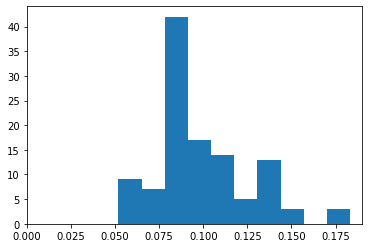

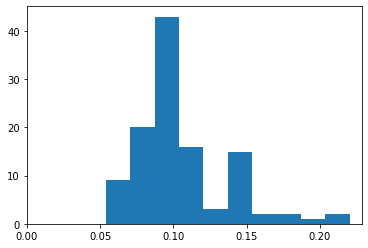

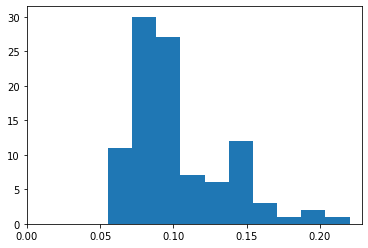

In [171]:
# your solution here please

interestsmax = np.array([])
interestsmin = np.array([])
rand = np.array([])
randate = 0

x = dates[:-24]
y = values[:-24]
a = np.where((y[1:-1] >= y[:-2]) & (y[1:-1] >= y[2:]))[0] + 1
b = np.where((y[1:-1] <= y[:-2]) & (y[1:-1] <= y[2:]))[0] + 1

interestsmax = interest(y[a], values[-1], dates[-1] - x[a])
interestsmin = interest(y[b], values[-1], dates[-1] - x[b])
for i in range(0, 100):
    randate = nr.randint(0, len(dates) - 24)
    rand = np.append(rand, interest(values[randate], values[-1], dates[-1] -dates[randate]))

print("For maxima time to invest", np.mean(interestsmax) * 100, "%")
print("For minima time to invest", np.mean(interestsmin) * 100, "%")
print("For random time to invest", np.mean(rand) * 100, "%")


plt.hist(interestsmax, 10)
plt.xlim(left=0)
plt.show()
plt.hist(interestsmin, 10)
plt.xlim(left=0)
plt.show()
plt.hist(rand, 10)
plt.xlim(left=0)
plt.show()

## Your solution here please

## Epilogue

We investigated the consequences of a *one-time* investment into the MSCI-World index. In most cases, people do not have a large amount of money they can invest in a single-shot. Instead, a typical investment is with a regular savings rate, e.g. an investment of 100 Euros per month. Although the calculations for this case are a bit more complicated, you could do all of them with what you know already! You will notice that the results are very similar but the time-frame of your investment needs to be longer to reach the *no-loss* zone.

I am doing monthly investments into the MSCI-World myself as part of my retirement provision. If you are interested, here is a [very good german video playlist](https://www.youtube.com/watch?v=R8fUq8e8I-I&list=PLIRB0hpiwW9D5vpLBeTucW9EAM_ub7SfE) on how you can start yourself. With a time-horizon of about 40 years until retirement and a lot of time for the compound interest effect to be effective, you could easily obtain a significant bonus for your retirement with only a moderate investment each month. Albert Einstein once called the compound interest effect the eigth world wonder! 